In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/home/enespolat/anaconda3/envs/pytorchenv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
transform= transforms.ToTensor()

In [4]:
train_data= datasets.MNIST(root='Data',train=True,download=True,transform=transform)
train_data

100.1%

Extracting Data/MNIST/raw/train-images-idx3-ubyte.gz to Data/MNIST/raw


113.5%

Extracting Data/MNIST/raw/train-labels-idx1-ubyte.gz to Data/MNIST/raw


100.4%

Extracting Data/MNIST/raw/t10k-images-idx3-ubyte.gz to Data/MNIST/raw


180.4%

Extracting Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to Data/MNIST/raw
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data=datasets.MNIST(root='Data',train=False,download=True,transform=transform)

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
image, label=train_data[0]

In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [10]:
label

5

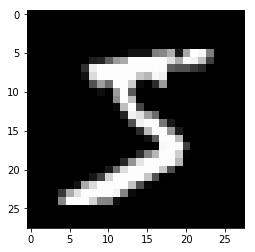

In [12]:
plt.imshow(train_data[0][0].reshape((28,28)),cmap='gray');

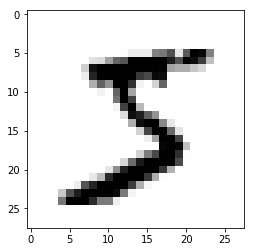

In [13]:
plt.imshow(train_data[0][0].reshape((28,28)),cmap='gist_yarg');

In [14]:
torch.manual_seed(42)
train_load=DataLoader(train_data,batch_size=100,shuffle=True)
test_load=DataLoader(test_data,batch_size=500,shuffle=False)

Labels [   2    5    4    0    1    6    4    2    2    2    6    3]


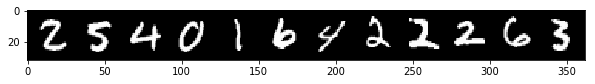

In [16]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

for images, labels in train_load:
    break

    
print('Labels', labels[:12].numpy())

im=make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [17]:
class MultilayerPerceptron(nn.Module):
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        super().__init__()
        self.fc1=nn.Linear(in_sz,layers[0])
        self.fc2=nn.Linear(layers[0],layers[1])
        self.fc3=nn.Linear(layers[1],out_sz)
        
    def forward(self,X):
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        return F.log_softmax(X,dim=1)
        

In [18]:
torch.manual_seed(101)
model=MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [19]:
def count_parameters(model):
    params=[p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'_________\n{sum(params):>6}')
    

In [20]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
_________
105214


In [21]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [22]:
for images, labels in train_load:
    print('Batch shape:',images.size())
    break


Batch shape: torch.Size([100, 1, 28, 28])


In [24]:
images.view(100,-1).size()

torch.Size([100, 784])

In [25]:
import time
start_time=time.time()

epochs=10
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    
    for b, (X_train, y_train) in enumerate(train_load):
        b+=1
        
        y_pred=model(X_train.view(100,-1))
        loss=criterion(y_pred,y_train)
        
        predicted=torch.max(y_pred.data, 1)[1]
        batch_corr=(predicted==y_train).sum()
        trn_corr+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200==0:
            print(f'epoch:{i:2} batch:{b:4} [{100*b:6}/60000] loss: {loss.item():10.8f} accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_load):
            y_val=model(X_test.view(500,-1))
            
            predicted=torch.max(y_val.data,1)[1]
            tst_corr+=(predicted==y_test).sum()
    
    loss=criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


print(f'\nDuration:{time.time()-start_time:.0f} seconds')

epoch: 0 batch: 200 [ 20000/60000] loss: 0.35145184 accuracy:  82.675%
epoch: 0 batch: 400 [ 40000/60000] loss: 0.32269004 accuracy:  87.368%
epoch: 0 batch: 600 [ 60000/60000] loss: 0.31318700 accuracy:  89.522%
epoch: 1 batch: 200 [ 20000/60000] loss: 0.20233649 accuracy:  94.785%
epoch: 1 batch: 400 [ 40000/60000] loss: 0.14103594 accuracy:  95.165%
epoch: 1 batch: 600 [ 60000/60000] loss: 0.12899432 accuracy:  95.458%
epoch: 2 batch: 200 [ 20000/60000] loss: 0.14132079 accuracy:  96.825%
epoch: 2 batch: 400 [ 40000/60000] loss: 0.06761119 accuracy:  96.730%
epoch: 2 batch: 600 [ 60000/60000] loss: 0.03776224 accuracy:  96.842%
epoch: 3 batch: 200 [ 20000/60000] loss: 0.09675352 accuracy:  97.595%
epoch: 3 batch: 400 [ 40000/60000] loss: 0.06878857 accuracy:  97.547%
epoch: 3 batch: 600 [ 60000/60000] loss: 0.08576169 accuracy:  97.502%
epoch: 4 batch: 200 [ 20000/60000] loss: 0.05050634 accuracy:  98.210%
epoch: 4 batch: 400 [ 40000/60000] loss: 0.07183621 accuracy:  98.177%
epoch:

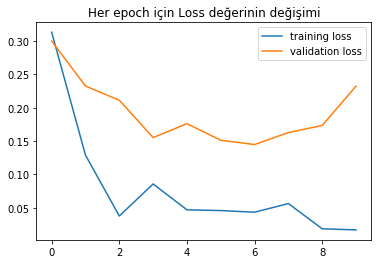

In [27]:
plt.plot(train_losses,label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Her epoch için Loss değerinin değişimi')
plt.legend();

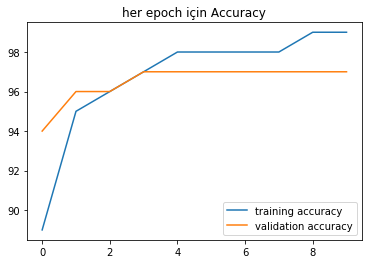

In [28]:
plt.plot([t/600 for t in train_correct],label='training accuracy')
plt.plot([t/100 for t in test_correct],label='validation accuracy')
plt.title('her epoch için Accuracy')
plt.legend();

In [29]:
print(test_correct)

[tensor(9439), tensor(9635), tensor(9666), tensor(9715), tensor(9745), tensor(9757), tensor(9743), tensor(9779), tensor(9761), tensor(9705)]


In [30]:
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%')

Test accuracy: 97.050%


In [31]:
test_load_all=DataLoader(test_data,batch_size=10000,shuffle=False)

In [32]:
with torch.no_grad():
    correct=0
    for X_test, y_test in test_load_all:
        y_val=model(X_test.view(len(X_test),-1))
        predicted=torch.max(y_val,1)[1]
        correct+=(predicted==y_test).sum()
print(f'Test accuracy:  {correct.item()}/{len(test_data)}={correct.item()*100/(len(test_data)):7.3f}%')
    

Test accuracy:  9705/10000= 97.050%


In [33]:
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()
print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    5    0    4    2    6    0    4    1]
 [   0 1126    5    0    0    0    4    5    2    4]
 [   1    2  994    4    3    0    3    7    1    0]
 [   3    1   13  987    0    3    0    4   11    4]
 [   0    0    1    0  953    1    1    1    1    6]
 [   2    2    1    9    2  883   41    0   22   10]
 [   0    2    1    0    6    0  899    0    1    0]
 [   2    0    6    5    2    1    3 1005    7   12]
 [   1    2    6    1    1    1    1    1  919    3]
 [   1    0    0    4   11    1    0    5    6  969]]


In [34]:
misses=np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] !=y_test[i]:
        misses=np.append(misses,i).astype('int64')
        
len(misses)

295

In [35]:
misses[:10]

array([  20,   33,   62,  115,  151,  217,  247,  259,  321,  381])

In [39]:
r=15
row=iter(np.array_split(misses,len(misses)//r+1))

Index: [  20   33   62  115  151  217  247  259  321  381  386  439  445  446
  447]
Label: [   9    4    9    4    9    6    4    6    2    3    6    6    6    6
    4]
Guess: [   7    0    5    9    8    5    6    0    7    7    5    5    0    5
    9]


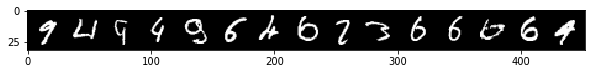

In [40]:
nextrow=next(row)
print('Index:',nextrow)
print('Label:',y_test.index_select(0,torch.tensor(nextrow)).numpy())
print('Guess:',predicted.index_select(0,torch.tensor(nextrow)).numpy())

images=X_test.index_select(0,torch.tensor(nextrow))
im=make_grid(images,nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));